In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Part 1

Basic Data Understanding (Pandas)

In [109]:
data1 = pd.read_csv('covid_19_clean_complete.csv')

In [7]:
data1.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


The shape, column names, and data types

In [8]:
data1.shape

(49068, 10)

In [9]:
data1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [10]:
data1.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

Missing values and Duplicate Values

In [11]:
data1.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [12]:
data1.duplicated().sum()

np.int64(0)

In [13]:
data1.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [110]:
print(data1['Country/Region'].nunique())


187


In [15]:
data1['Date'] = pd.to_datetime(data1['Date'])
latest_date = data1['Date'].max()
print("Latest date in dataset:", latest_date)

Latest date in dataset: 2020-07-27 00:00:00


Part 2 – EDA (Exploratory Data Analysis)

Histogram of confirmed cases.

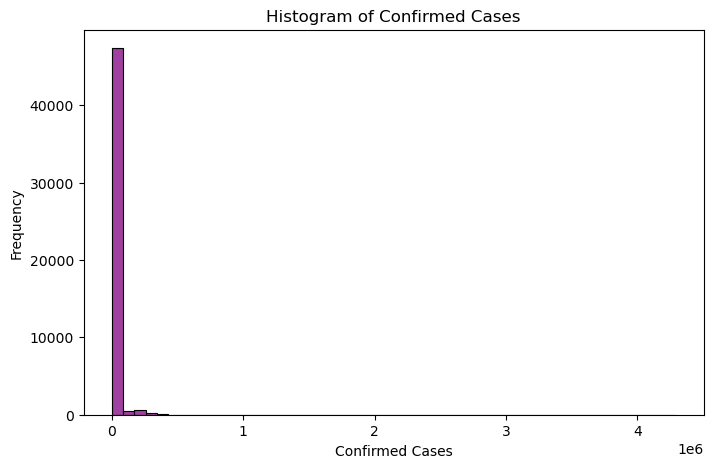

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(data1['Confirmed'], bins=50, color='purple')
plt.title("Histogram of Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Frequency")
plt.show()


In [17]:
latest_df = data1[data1['Date'] == latest_date]

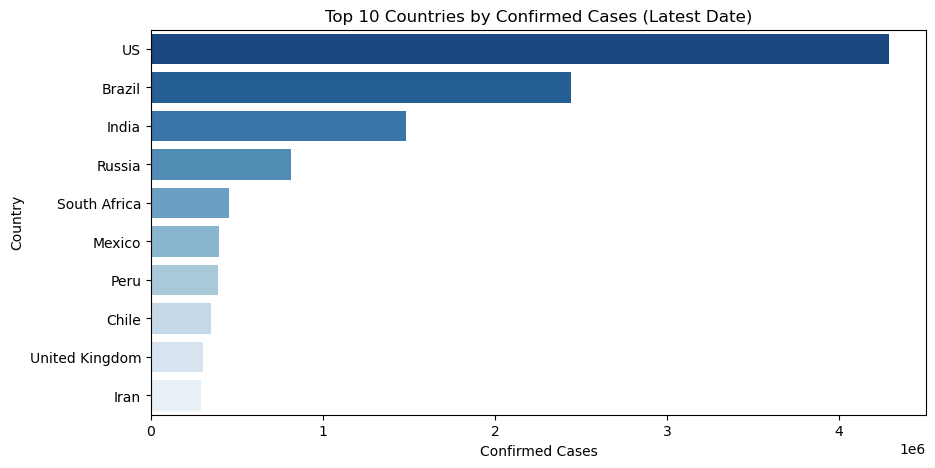

In [18]:
top10_confirmed = latest_df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10_confirmed.values, y=top10_confirmed.index, hue=top10_confirmed.index, palette='Blues_r',legend=False)
plt.title("Top 10 Countries by Confirmed Cases (Latest Date)")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.show()

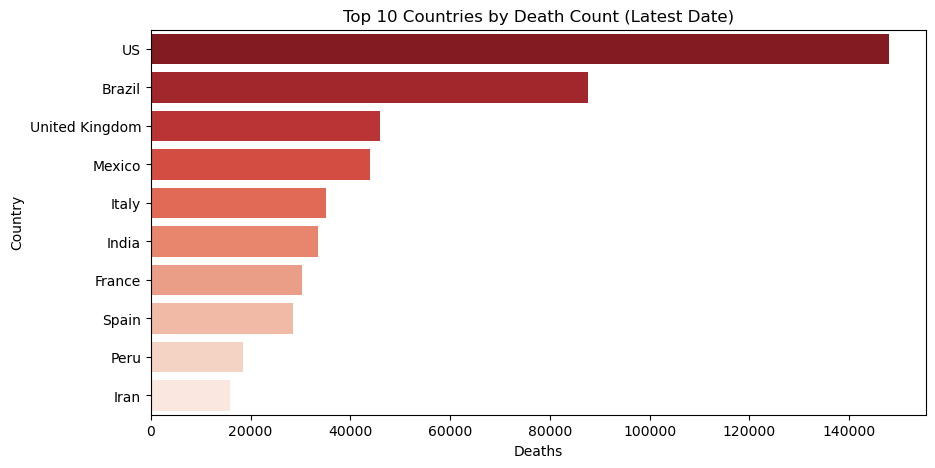

In [19]:
top10_deaths = latest_df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10_deaths.values,y=top10_deaths.index,hue=top10_deaths.index,palette='Reds_r',legend=False)
plt.title("Top 10 Countries by Death Count (Latest Date)")
plt.xlabel("Deaths")
plt.ylabel("Country")
plt.show()

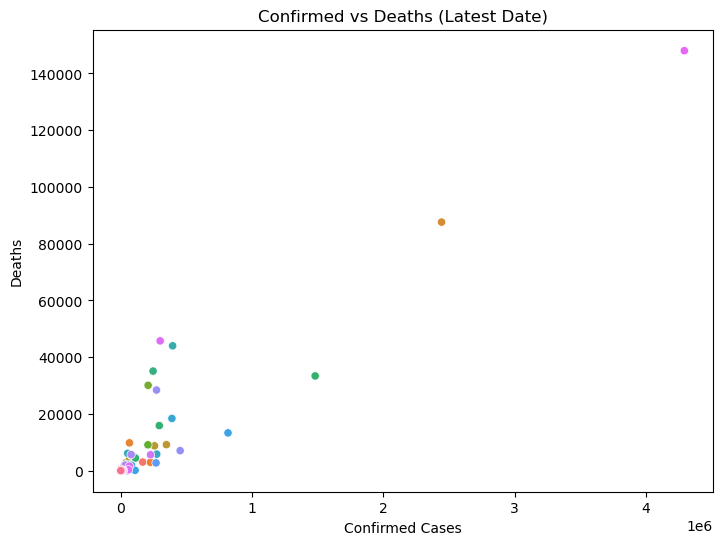

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=latest_df, x='Confirmed', y='Deaths', hue='Country/Region', legend=False)
plt.title("Confirmed vs Deaths (Latest Date)")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.show()

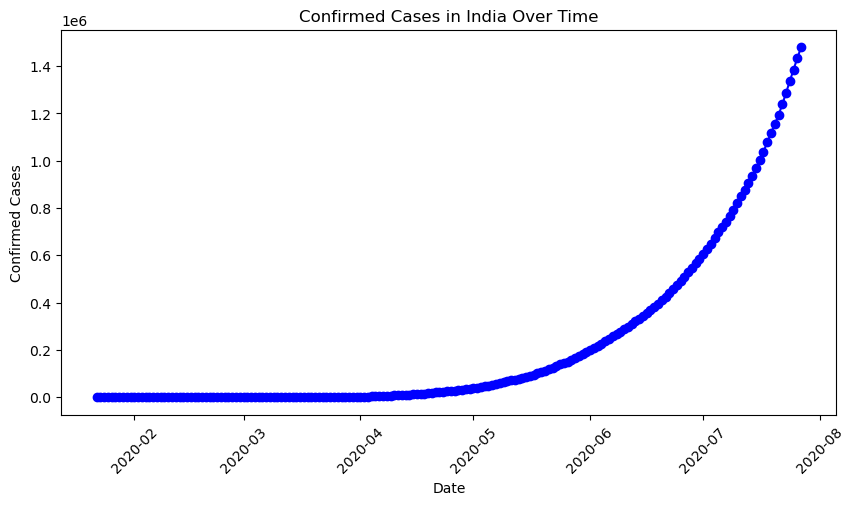

In [21]:
india_data = data1[data1['Country/Region'] == "India"].groupby('Date')['Confirmed'].sum()
plt.figure(figsize=(10,5))
plt.plot(india_data.index, india_data.values, marker='o', color='blue')
plt.title("Confirmed Cases in India Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.show()

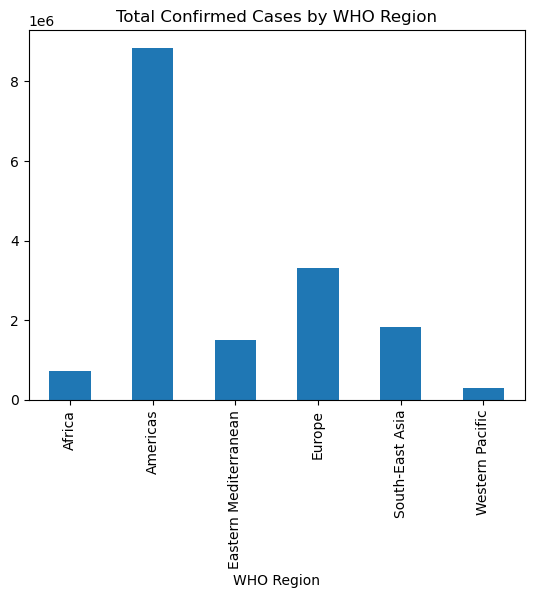

In [22]:
continent_df = latest_df.groupby('WHO Region')['Confirmed'].sum()
continent_df.plot(kind='bar')
plt.title('Total Confirmed Cases by WHO Region')
plt.show()

Part 3 – Statistics

In [ ]:
latest_df = data1[data1['Date'] == data1['Date'].max()]

In [58]:
mean_confirmed = latest_df['Confirmed'].mean()
median_confirmed = latest_df['Confirmed'].median()
mode_confirmed = latest_df['Confirmed'].mode()[0]

print("Mean Confirmed Cases:", mean_confirmed)
print("Median Confirmed Cases:", median_confirmed)
print("Mode Confirmed Cases:", mode_confirmed)

Mean Confirmed Cases: 63143.620689655174
Median Confirmed Cases: 1879.0
Mode Confirmed Cases: 12


In [57]:
variance_deaths = latest_df['Deaths'].var()
std_deaths = latest_df['Deaths'].std()

print("Variance of Deaths:", variance_deaths)
print("Standard Deviation of Deaths:", std_deaths)


Variance of Deaths: 144503717.1098144
Standard Deviation of Deaths: 12020.969890562676


In [56]:
correlation = latest_df['Confirmed'].corr(latest_df['Deaths'])
print("Correlation between Confirmed and Deaths:", correlation)

Correlation between Confirmed and Deaths: 0.9355481171091944


In [59]:
prob_confirmed_over_100k = (latest_df['Confirmed'] > 100000).mean()
print("Probability(Confirmed > 100k):", prob_confirmed_over_100k)

Probability(Confirmed > 100k): 0.08812260536398467


In [29]:
latest_df = data1[data1['Date'] == data1['Date'].max()].copy()
latest_df['death_rate'] = (latest_df['Deaths'] / latest_df['Confirmed']) * 100
prob_death_rate_over_5 = (latest_df['death_rate'] > 5).mean()
print("Probability(Death Rate > 5%):", prob_death_rate_over_5)

Probability(Death Rate > 5%): 0.16091954022988506


Part 4 – Linear Algebra & NumPy

In [61]:
latest_df = data1[data1['Date'] == data1['Date'].max()]
valid_cases_df = latest_df[latest_df['Confirmed'] > 0].copy()

In [63]:
confirmed = np.array(valid_cases_df['Confirmed'])
deaths = np.array(valid_cases_df['Deaths'])

In [64]:
print("Confirmed array:", confirmed)
print("Deaths array:", deaths)

Confirmed array: [  36263    4880   27973     907     950      86  167416   37390     113
    3699      31    1076     447     229    9049     659   20558   30446
     382   39482  226225     110   67251   66428    1770      99   71181
   10498 2442375     141   10621    1100    2328     226   17110   10390
    3500     400     170     266    1067   40673      36   58728    1209
    4599     922  347923     991     931     583     366     167    1672
     255     147     171     349     947    1276    2778   68135    1019
     258     655     932     157     209      46      75      18     323
     799     743     201     604     204       1     311     190    1270
  257101    3200    8844   15841   15655    4881    2532    1060   15516
     214      14   13547    5059   64156   81161   92482   15035    3071
     265    2034    2316   14547      27    7398    7514      62     203
    2900      22     657       7      49     269  208665    7189     326
    1137  207112   33624    4227  

In [66]:
diff = confirmed - deaths
print("Difference (Confirmed - Deaths):", diff[:5])

Difference (Confirmed - Deaths): [34994  4736 26810   855   909]


In [67]:
dot_product = np.dot(confirmed, deaths)
print("Dot product:", dot_product)

Dot product: 996117088650


In [69]:
matrix = np.vstack((confirmed, deaths)).T  
weights = np.array([0.7, 0.3])
weighted_result = matrix @ weights
print("Weighted Result:", weighted_result[:5])

Weighted Result: [25764.8  3459.2 19930.    650.5   677.3]


In [71]:
confirmed_normalized = (confirmed - np.min(confirmed)) / (np.max(confirmed) - np.min(confirmed))
print("Normalized Confirmed:", confirmed_normalized[:5])

Normalized Confirmed: [0.00845217 0.00113723 0.00651989 0.00021118 0.0002212 ]


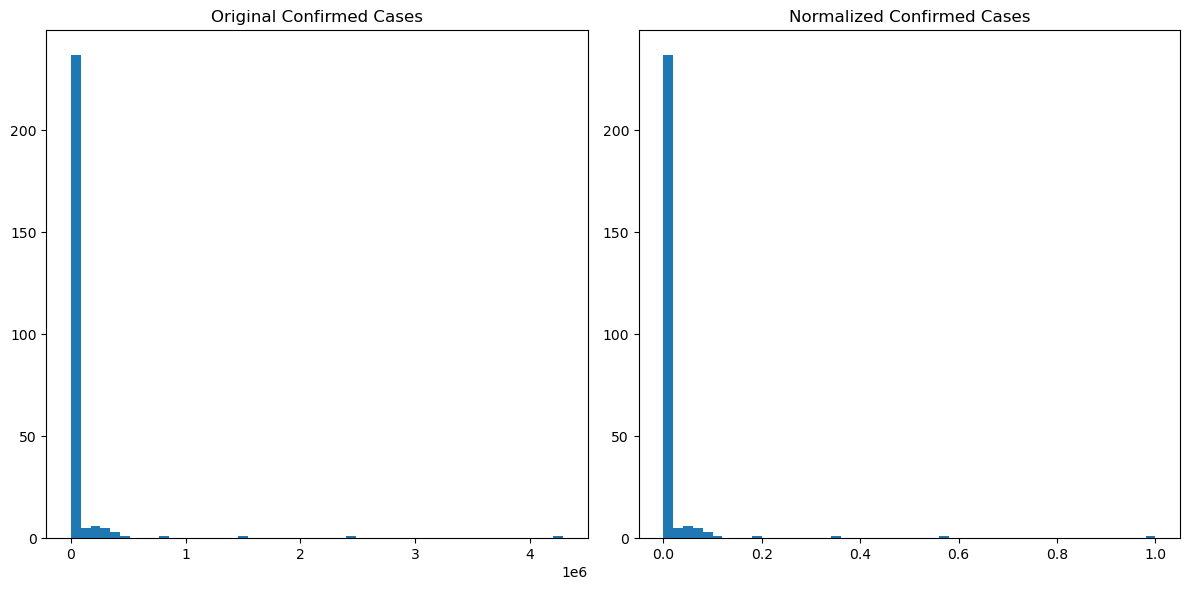

In [73]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(confirmed, bins=50)
plt.title("Original Confirmed Cases")
plt.subplot(1, 2, 2)
plt.hist(confirmed_normalized, bins=50)
plt.title("Normalized Confirmed Cases")
plt.tight_layout()
plt.show()

Part 5 – Calculus

In [74]:
sample_data = valid_cases_df[['Country/Region', 'Confirmed', 'Deaths']].head(5).copy()

In [75]:
sample_data['dS_dDeaths'] = 100 / sample_data['Confirmed']

In [76]:
print(sample_data[['Country/Region', 'Confirmed', 'dS_dDeaths']])

      Country/Region  Confirmed  dS_dDeaths
48807    Afghanistan      36263    0.002758
48808        Albania       4880    0.020492
48809        Algeria      27973    0.003575
48810        Andorra        907    0.110254
48811         Angola        950    0.105263


Part 6 – Feature Engineering

In [37]:
data1['death_rate'] = (data1['Deaths'] / data1['Confirmed']) * 100


In [38]:
data1['recovery_rate'] = (data1['Recovered'] / data1['Confirmed']) * 100


In [79]:
data1['high_risk'] = np.where(data1['death_rate'] > 5, 1, 0)


In [40]:
data1['confirmed_quartile'] = pd.qcut(data1['Confirmed'], 4, labels=False)


In [41]:
data1['active_cases'] = data1['Confirmed'] - (data1['Deaths'] + data1['Recovered'])


In [42]:
avg_confirmed = data1['Confirmed'].mean()
data1['above_average_confirmed'] = np.where(data1['Confirmed'] > avg_confirmed, 1, 0)

In [80]:
data1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,death_rate,recovery_rate,high_risk,confirmed_quartile,active_cases,above_average_confirmed,Continent
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,NaN,NaN,0,0,0,0,NaN
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,NaN,NaN,0,0,0,0,NaN
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,NaN,NaN,0,0,0,0,NaN
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,NaN,NaN,0,0,0,0,NaN
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,NaN,NaN,0,0,0,0,NaN


Part 7 – SQL Simulation in Pandas

In [81]:
high_death_rate = data1[data1['death_rate'] > 5]


In [45]:
sorted_by_confirmed = data1.sort_values(by='Confirmed', ascending=False)


In [87]:
data1['Continent'] = data1['WHO Region']

In [47]:
avg_death_rate_by_continent = data1.groupby('Continent')['death_rate'].mean().reset_index()


In [48]:
top5_recovery_rate = data1.sort_values(by='recovery_rate', ascending=False).head(5)


In [49]:
low_risk_high_cases = data1[(data1['Confirmed'] > 1_000_000) & (data1['death_rate'] < 2)]


In [89]:
print( high_death_rate,"\n")
print(sorted_by_confirmed,"\n")
print(avg_death_rate_by_continent,"\n")
print(top5_recovery_rate,"\n")
print(low_risk_high_cases, "\n")

               Province/State  Country/Region        Lat        Long  \
318                     Hebei           China  39.549000  116.130600   
579                     Hebei           China  39.549000  116.130600   
580              Heilongjiang           China  47.862000  127.761500   
840                     Hebei           China  39.549000  116.130600   
841              Heilongjiang           China  47.862000  127.761500   
...                       ...             ...        ...         ...   
49028                     NaN  United Kingdom  55.378100   -3.436000   
49039                     NaN           Syria  34.802075   38.996815   
49053  British Virgin Islands  United Kingdom  18.420700  -64.640000   
49062                     NaN  Western Sahara  24.215500  -12.885800   
49064                     NaN           Yemen  15.552727   48.516388   

            Date  Confirmed  Deaths  Recovered  Active             WHO Region  \
318   2020-01-23          1       1          0       0

Part 8 – Insights

In [91]:
top_country = data1.sort_values('Confirmed', ascending=False).iloc[0]

In [96]:
print(f"Highest confirmed cases: {top_country['Country/Region']}")

Highest confirmed cases: US


In [97]:
high_death = data1[data1['Confirmed'] > 10000].sort_values('death_rate', ascending=False).iloc[0]
print(f"Highest death rate: {high_death['Country/Region']} ({high_death['death_rate']:.1f}%)")

Highest death rate: Belgium (16.4%)


In [98]:
best_recovery_continent = data1.groupby('Continent')['recovery_rate'].mean().idxmax()
print(f"\n3. Best recovery continent: {best_recovery_continent}")


3. Best recovery continent: Western Pacific


In [101]:
corr = data1[['Confirmed', 'Deaths']].corr().iloc[0,1]
print(f"Correlation between cases and deaths: {corr:.2f}")

Correlation between cases and deaths: 0.91


In [103]:
high_death_df = data1[data1['death_rate'] > 5]
case_percentile = (high_death_df['Confirmed'].rank(pct=True).mean()*100)
print(f"High death rate countries are at {case_percentile:.1f}th percentile for case counts")

High death rate countries are at 50.0th percentile for case counts


In [104]:
quartile_death = data1.groupby('confirmed_quartile')['death_rate'].mean()
print("\n6. Average death rate by case volume quartile:")
print(quartile_death)


6. Average death rate by case volume quartile:
confirmed_quartile
0    1.977964
1    2.643458
2    2.150164
3    3.765716
Name: death_rate, dtype: float64


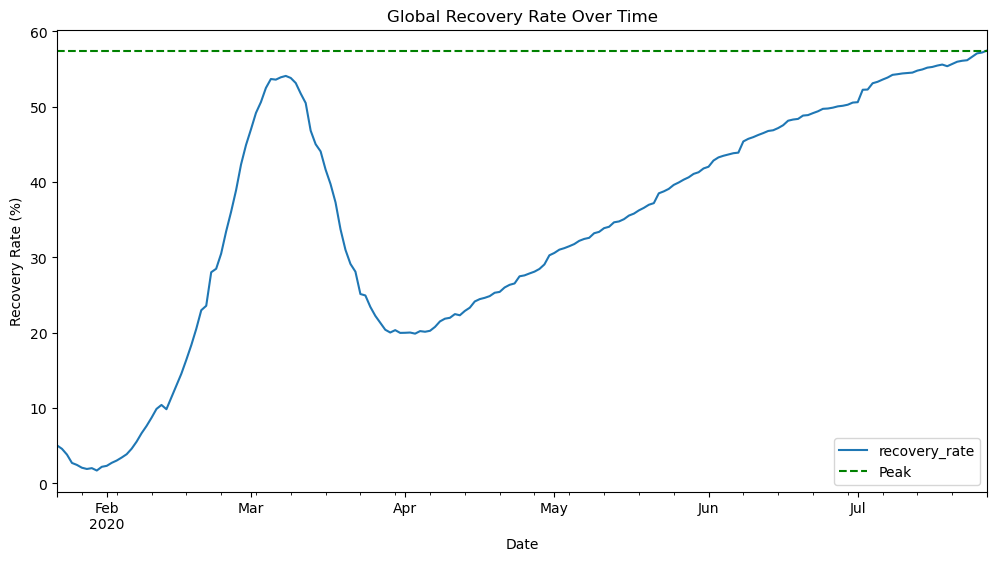

In [105]:
data1['Date'] = pd.to_datetime(data1['Date'])
global_daily = data1.groupby('Date')[['Confirmed', 'Recovered']].sum()
global_daily['recovery_rate'] = (global_daily['Recovered'] / global_daily['Confirmed']) * 100

plt.figure(figsize=(12,6))
global_daily['recovery_rate'].plot()
plt.title("Global Recovery Rate Over Time")
plt.ylabel("Recovery Rate (%)")
plt.axhline(y=global_daily['recovery_rate'].max(), color='g', linestyle='--', label='Peak')
plt.legend()
plt.show()